In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib directly

# Load the dataset
dataset = pd.read_csv("updated_dataset1.csv")

accuracies = []

# Data Preprocessing
X = dataset.drop(columns=['MatchResult'])  # Features
y = dataset['MatchResult']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
categorical_features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'Continent']

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the XGBoost model with hyperparameters and regularization
model = XGBClassifier(
    max_depth=3,  
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=0.1,  
    reg_lambda=0.1,
    random_state=42
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(pipeline, 'football_model.joblib')

# Print model accuracies
training_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
testing_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
#print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)
accuracies.append(round(testing_accuracy*100,2))




Testing Accuracy: 0.7075386012715713


In [61]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('updated_dataset1.csv')

# Drop the 'home_score' and 'away_score' columns
data.drop(['home_score', 'away_score'], axis=1, inplace=True)

# Drop irrelevant columns (if any) and select relevant features and the target variable
features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month', 'day', 'Continent', 'MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
target = 'MatchResult'
data = data[features + [target]]

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
data['tournament'] = label_encoder.fit_transform(data['tournament'])
data['city'] = label_encoder.fit_transform(data['city'])
data['country'] = label_encoder.fit_transform(data['country'])
data['Continent'] = label_encoder.fit_transform(data['Continent'])

# Convert 'neutral' column to numerical (TRUE: 1, FALSE: 0)
data['neutral'] = data['neutral'].astype(int)

# Map team names to numerical representations
data['home_team'] = label_encoder.fit_transform(data['home_team'])
data['away_team'] = label_encoder.fit_transform(data['away_team'])

# Convert 'month' column to numerical representation using a mapping
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_to_num = {month: num+1 for num, month in enumerate(months)}
data['month'] = data['month'].map(month_to_num)

# Split the data into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy (Logistic Regression):", training_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Logistic Regression):", test_accuracy)

accuracies.append(round(test_accuracy*100,2))'''


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset and split into training and testing sets
# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, and y_test
from sklearn.model_selection import train_test_split
# Load the dataset
dataset = pd.read_csv("updated_dataset1.csv")

# Data Preprocessing
X = dataset.drop(columns=['MatchResult'])  # Features
y = dataset['MatchResult']  # Target variable

# Assuming you have loaded your dataset into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
categorical_features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'Continent']

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the SVC model with adjusted hyperparameters
model = LogisticRegression()
    #LogisticRegression(solver='newton-cg',penalty='l2',max_iter=2000)
    #LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000)
    #LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    #LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    #LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000)
    

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy:", training_accuracy)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)





Testing Accuracy: 0.6893732970027248


C:\Users\Kunal Bhoite\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('updated_dataset1.csv')

# Drop the 'home_score' and 'away_score' columns
data.drop(['home_score', 'away_score'], axis=1, inplace=True)

# Drop irrelevant columns (if any) and select relevant features and the target variable
features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month', 'day', 'Continent', 'MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
target = 'MatchResult'
data = data[features + [target]]

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
data['tournament'] = label_encoder.fit_transform(data['tournament'])
data['city'] = label_encoder.fit_transform(data['city'])
data['country'] = label_encoder.fit_transform(data['country'])
data['Continent'] = label_encoder.fit_transform(data['Continent'])

# Convert 'neutral' column to numerical (TRUE: 1, FALSE: 0)
data['neutral'] = data['neutral'].astype(int)

# Map team names to numerical representations
data['home_team'] = label_encoder.fit_transform(data['home_team'])
data['away_team'] = label_encoder.fit_transform(data['away_team'])

# Convert 'month' column to numerical representation using a mapping
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_to_num = {month: num+1 for num, month in enumerate(months)}
data['month'] = data['month'].map(month_to_num)

# Split the data into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Machines (SVM) model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy (SVM):", training_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (SVM):", test_accuracy)

accuracies.append(round(test_accuracy*100,2))





Test Accuracy (SVM): 0.5858310626702997


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('updated_dataset1.csv')

# Drop the 'home_score' and 'away_score' columns
data.drop(['home_score', 'away_score'], axis=1, inplace=True)

# Drop irrelevant columns (if any) and select relevant features and the target variable
features = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month', 'day', 'Continent', 'MaximumTemp_Month', 'MinimumTemp_Month', 'HomeTeamRank', 'AwayTeamRank']
target = 'MatchResult'
data = data[features + [target]]

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
data['tournament'] = label_encoder.fit_transform(data['tournament'])
data['city'] = label_encoder.fit_transform(data['city'])
data['country'] = label_encoder.fit_transform(data['country'])
data['Continent'] = label_encoder.fit_transform(data['Continent'])

# Convert 'neutral' column to numerical (TRUE: 1, FALSE: 0)
data['neutral'] = data['neutral'].astype(int)

# Map team names to numerical representations
data['home_team'] = label_encoder.fit_transform(data['home_team'])
data['away_team'] = label_encoder.fit_transform(data['away_team'])

# Convert 'month' column to numerical representation using a mapping
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_to_num = {month: num+1 for num, month in enumerate(months)}
data['month'] = data['month'].map(month_to_num)

# Split the data into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy (Naive Bayes):", training_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Naive Bayes):", test_accuracy)


accuracies.append(round(test_accuracy*100,2))

Test Accuracy (Naive Bayes): 0.6530426884650318


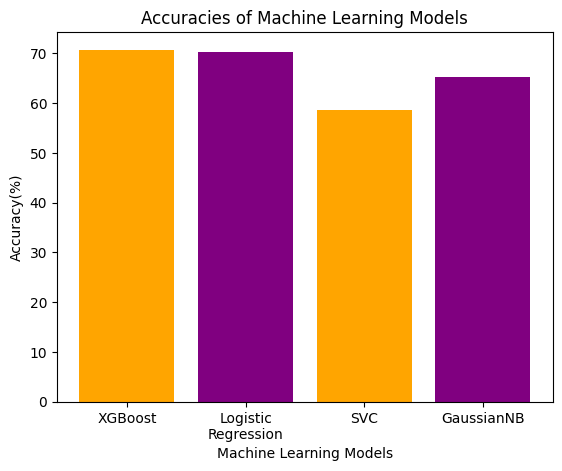

In [54]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy scores
model = ['XGBoost','Logistic\nRegression','SVC','GaussianNB']

# Create a bar chart
plt.bar(model, accuracies, color=['orange', 'purple'])

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracies of Machine Learning Models')

# Show the bar chart
plt.show()

In [55]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.
